## 作業一

* 閱讀下方YT教學 (建議用1.25-1.5倍速觀看)

* 做ppt(7頁左右)簡易講解Deep Learning (不用介紹歷史)

* 介紹重點:  what/why/how deep learning?  各layer介紹 

[Brief Introduction of Deep Learning 李弘毅](https://www.youtube.com/watch?v=Dr-WRlEFefw&list=PLJV_el3uVTsPy9oCRY30oBPNLCo89yu49&index=11)

[“Hello world” of deep learning 李弘毅](https://www.youtube.com/watch?v=Lx3l4lOrquw&list=PLJV_el3uVTsPy9oCRY30oBPNLCo89yu49&index=13)



### 作業二

參考下方資料,架設NN model 進行手寫辨識

[Keras 2.0](https://www.youtube.com/watch?v=5BJDJd-dzzg&list=PLJV_el3uVTsPy9oCRY30oBPNLCo89yu49&index=14)

[Keras Demo](https://www.youtube.com/watch?v=L8unuZNpWw8&list=PLJV_el3uVTsPy9oCRY30oBPNLCo89yu49&index=15)

[參考作法](http://puremonkey2010.blogspot.com/2017/06/toolkit-keras-mnist.html)

# 參考資料
## 實作:
[Save & reload 保存提取](https://morvanzhou.github.io/tutorials/machine-learning/keras/3-1-save/)

[Toolkit Keras - MNIST 手寫數字辨識使用 CNN](http://puremonkey2010.blogspot.com/2017/07/toolkit-keras-mnist-cnn.html)

[初學Python手記#3-資料前處理( Label encoding、 One hot encoding)](https://medium.com/@PatHuang/%E5%88%9D%E5%AD%B8python%E6%89%8B%E8%A8%98-3-%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86-label-encoding-one-hot-encoding-85c983d63f87)


## 觀念:
[深度學習最常用的算法:Adam優化算法](https://juejin.im/entry/5983115f6fb9a03c50227fd4)

[Day 05：Keras 模型、函數及參數使用說明](https://ithelp.ithome.com.tw/articles/10191725)

[機器/深度學習: 基礎介紹-損失函數(loss function)](https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8-%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92-%E5%9F%BA%E7%A4%8E%E4%BB%8B%E7%B4%B9-%E6%90%8D%E5%A4%B1%E5%87%BD%E6%95%B8-loss-function-2dcac5ebb6cb)

[機器學習：梯度消失（vanishing gradient）與梯度爆炸（exploding gradient）問題](https://www.itread01.com/content/1542206046.html)




## 下載 Mnist 資料 
## 我們將建立以下 Keras 程式, 下載並讀取 mnist 資料. 

### STEP1. 匯入 Keras 及相關模組 

In [1]:
!pip list


Package              Version  
-------------------- ---------
absl-py              0.10.0   
argon2-cffi          20.1.0   
astor                0.8.1    
attrs                20.1.0   
backcall             0.2.0    
bleach               3.1.5    
certifi              2020.6.20
cffi                 1.14.2   
colorama             0.4.3    
colour               0.1.5    
cycler               0.10.0   
Cython               0.29.21  
decorator            4.4.2    
defusedxml           0.6.0    
entrypoints          0.3      
future               0.18.2   
gast                 0.4.0    
grpcio               1.31.0   
h5py                 2.10.0   
imageio              2.9.0    
importlib-metadata   1.7.0    
ipykernel            5.3.4    
ipython              7.16.1   
ipython-genutils     0.2.0    
ipywidgets           7.5.1    
jedi                 0.17.2   
Jinja2               2.11.2   
joblib               0.16.0   
jsonschema           3.2.0    
jupyter              1.0.0    
jupyter-

You are using pip version 18.1, however version 20.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import numpy as np  
import pandas as pd  
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
  
# np.random.seed(10)  


Using TensorFlow backend.


### STEP2. 下載 mnist 資料 

In [3]:
from keras.datasets import mnist  

### STEP3. 讀取與查看 mnist 資料 

In [4]:
(X_train_image, y_train_label), (X_test_image, y_test_label) = mnist.load_data()  
print("\t[Info] train data={:7,}".format(len(X_train_image)))  #??
print("\t[Info] test  data={:7,}".format(len(X_test_image)))  

	[Info] train data= 60,000
	[Info] test  data= 10,000


## 查看訓練資料 
#### 接著我們來看載入資料的長相與格式. 

### STEP1. 訓練資料是由 images 與 labels 所組成 

In [5]:
print("\t[Info] Shape of train data=%s" % (str(X_train_image.shape)))  
print("\t[Info] Shape of train label=%s" % (str(y_train_label.shape)))
 #訓練資料是由 images 與 labels 所組成共有 60,000 筆, 每一筆代表某個數字的影像為 28x28 pixels.

	[Info] Shape of train data=(60000, 28, 28)
	[Info] Shape of train label=(60000,)


### STEP2. 定應 plot_image 函數顯示數字影像 

In [6]:
import matplotlib.pyplot as plt  
def plot_image(image):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='binary') # cmap='binary' 參數設定以黑白灰階顯示.  
    plt.show()  
#matplotlib.pyplot.gcf() 得到當前的 figure
#matplotlib.pyplot.gca() 得到當前的 axes
#matplotlib.pyplot.sca(ax) 設定當前的 axes，並且會自動更正 figure

### STEP3. 執行 plot_image 函數查看第 0 筆數字影像與 label 資料 

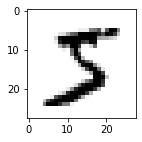

In [7]:
plot_image(X_train_image[0])

In [8]:
y_train_label[0]

5

## 查看多筆訓練資料 images 與 labels 
## 接下來我們將建立 plot_images_labels_predict 函數, 可以顯示多筆資料的影像與 label. 

### STEP1. 建立 plot_images_labels_predict() 函數 
 因為後續我們希望能很方便查看數字圖形, 真實的數字與預測結果, 所以我們建立了以下函數: 

In [9]:
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)   #設定圖片大小???
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()  

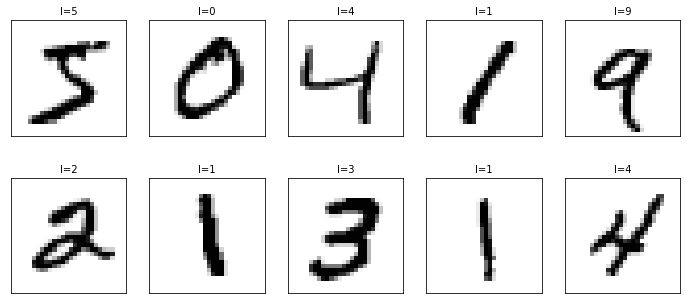

In [10]:
>>> plot_images_labels_predict(X_train_image, y_train_label, [], 0, 10)

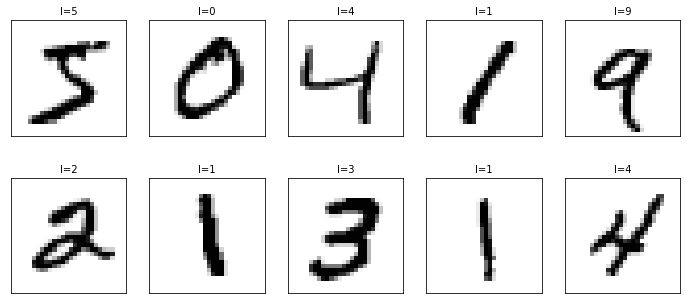

In [11]:
>>> plot_images_labels_predict(X_train_image, y_train_label, [], 0, 10)

## 多層感知器模型資料前處理 
 接下來我們建立 多層感知器模型 (MLP), 我們必須先將 images 與 labels 的內容進行前處理, 才能餵進去 Keras 預期的資料結構. 

### STEP1. features (數字影像的特徵值) 資料前處理 
 首先將 image 以 reshape 轉換為二維 ndarray 並進行 normalization (Feature scaling): 

In [12]:
x_Train = X_train_image.reshape(60000, 28*28).astype('float32')  
x_Test = X_test_image.reshape(10000, 28*28).astype('float32')  
print("\t[Info] xTrain: %s" % (str(x_Train.shape)))  
print("\t[Info] xTest: %s" % (str(x_Test.shape)))  
  
# Normalization  
x_Train_norm = x_Train/255  #(灰階除以255)
x_Test_norm = x_Test/255  

	[Info] xTrain: (60000, 784)
	[Info] xTest: (10000, 784)


### STEP2. labels (影像數字真實的值) 資料前處理 
 label 標籤欄位原本是 0-9 數字, 而為了配合 Keras 的資料格式, 我們必須進行 One-hot-encoding 將之轉換為 10 個 0 或 1 的組合, 例如數字 7 經過 One-hot encoding 轉換後是 0000000100, 正好對應到輸出層的 10 個神經元. 下面簡單測試過程: 

In [13]:
#>>> from ch6_1 import  # 載之前的代碼
>>> y_TrainOneHot = np_utils.to_categorical(y_train_label) # 將 training 的 label 進行 one-hot encoding
>>> y_TestOneHot = np_utils.to_categorical(y_test_label) # 將測試的 labels 進行 one-hot encoding



In [14]:
>>> y_train_label[0] # 檢視 training labels 第一個 label 的值


5

In [15]:
>>> y_TrainOneHot[:1] #檢視第一個 label 在 one-hot encoding 後的結果, 會在第六個位置上為 1, 其他位置上為 0
#array([[ 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

#### 建立模型我們將建立以下多層感知器 Multilayer Perceptron 模型, 輸入層 (x) 共有 28x28=784 個神經元, Hidden layers (h) 共有 256 層; 輸出層 (y) 共有 10 個 神經元: 

In [16]:
from keras.models import Sequential  
from keras.layers import Dense  
  
model = Sequential()  # Build Linear Model  
  
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu')) # Add Input/hidden layer  
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax')) # Add Hidden/output layer  
print("\t[Info] Model summary:")  
model.summary()  
print("")  

Instructions for updating:
Colocations handled automatically by placer.
	[Info] Model summary:
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________



![title](3946_4.png)

## 進行訓練 
當我們建立深度學習模型後, 就可以使用 Backpropagation 進行訓練. 

### STEP1. 定義訓練方式 
在訓練模型之前, 我們必須先使用 compile 方法, 對訓練模型進行設定, 代碼如下: 

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
'''
* loss: 設定 loss function, 在深度學習通常使用 cross_entropy (Cross entropy) 交叉摘順練效果較好.
* optimizer: 設定訓練時的優化方法, 在深度學習使用 adam 可以讓訓練更快收斂, 並提高準確率.
* metrics: 設定評估模型的方式是 accuracy (準確率)
'''

'\n* loss: 設定 loss function, 在深度學習通常使用 cross_entropy (Cross entropy) 交叉摘順練效果較好.\n* optimizer: 設定訓練時的優化方法, 在深度學習使用 adam 可以讓訓練更快收斂, 並提高準確率.\n* metrics: 設定評估模型的方式是 accuracy (準確率)\n'

### STEP2. 開始訓練 
#### 執行訓練的程式碼如下: 

In [18]:
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)  

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.4400 - accuracy: 0.8859 - val_loss: 0.2190 - val_accuracy: 0.9397
Epoch 2/10
 - 1s - loss: 0.1868 - accuracy: 0.9471 - val_loss: 0.1515 - val_accuracy: 0.9582
Epoch 3/10
 - 1s - loss: 0.1311 - accuracy: 0.9631 - val_loss: 0.1267 - val_accuracy: 0.9627
Epoch 4/10
 - 1s - loss: 0.0992 - accuracy: 0.9728 - val_loss: 0.1127 - val_accuracy: 0.9674
Epoch 5/10
 - 1s - loss: 0.0793 - accuracy: 0.9780 - val_loss: 0.0976 - val_accuracy: 0.9712
Epoch 6/10
 - 1s - loss: 0.0639 - accuracy: 0.9821 - val_loss: 0.0934 - val_accuracy: 0.9732
Epoch 7/10
 - 1s - loss: 0.0528 - accuracy: 0.9855 - val_loss: 0.0883 - val_accuracy: 0.9729
Epoch 8/10
 - 1s - loss: 0.0430 - accuracy: 0.9886 - val_loss: 0.0830 - val_accuracy: 0.9754
Epoch 9/10
 - 1s - loss: 0.0373 - accuracy: 0.9902 - val_loss: 0.0820 - val_accuracy: 0.9763
Epoch 10/10
 - 1s - loss: 0.0311 - accuracy: 0.9923 - val_loss: 0

* x=x_Train_norm: features 數字的影像特徵值 (60,000 x 784 的陣列).
* y=y_Train_OneHot: label 數字的 One-hot encoding 陣列 (60,000 x 10 的陣列)
* validation_split = 0.2: 設定訓練資料與 cross validation 的資料比率. 也就是說會有 0.8 * 60,000 = 48,000 作為訓練資料; 0.2 * 60,000 = 12,000 作為驗證資料.
* epochs = 10: 執行 10 次的訓練週期.
* batch_size = 200: 每一批次的訓練筆數為 200
* verbose = 2: 顯示訓練過程. 共執行 10 次 epoch (訓練週期), 每批 200 筆, 也就是每次會有 240 round (48,000 / 200 = 240). 每一次的 epoch 會計算 accuracy 並記錄在 train_history 中.

### STEP3. 建立 show_train_history 顯示訓練過程 
 之前訓練步驟會將每一個訓練週期的 accuracy 與 loss 記錄在 train_history 變數. 我們可以使用下面程式碼讀取 train_history 以圖表顯示訓練過程: 

In [19]:
import matplotlib.pyplot as plt  
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  

In [20]:
print(train_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


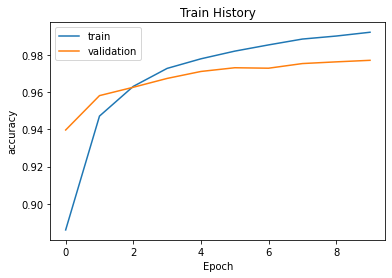

In [21]:
show_train_history(train_history, 'accuracy', 'val_accuracy')  

#### 如果 "acc 訓練的準確率" 一直提升, 但是 "val_acc 的準確率" 卻一直沒有增加, 就有可能是 Overfitting 的現象 (更多說明請參考 Bias, Variance, and Overfitting). 在完成所有 (epoch) 訓練週期後, 在後面還會使用測試資料來評估模型準確率, 這是另外一組獨立的資料, 所以計算準確率會更客觀. 
#### 接著我們來看 loss 誤差的執行結果: 

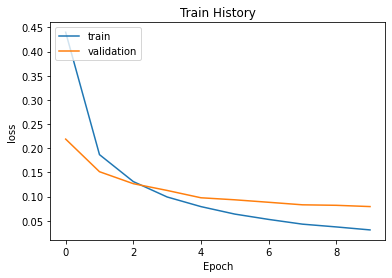

In [22]:
show_train_history(train_history, 'loss', 'val_loss')  

### 總共執行 10 個 Epoch 訓練週期, 可以發現: 
* 不論訓練與驗證, 誤差越來越低.
* 在 Epoch 訓練後期, "loss 訓練的誤差" 比 "val_loss 驗證的誤差" 小.

### STEP1. 評估模型準確率 
使用下面代碼評估模型準確率: 

In [23]:
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0)) 

10000/10000 [==============================] - 0s 36us/step

	[Info] Accuracy of testing data = 97.9%


### STEP2. 進行預測 
前面我們建立模型並於訓練後達成可以接受的 97% 準確率, 接著我們將使用此模型進行預測. 

	[Info] Making prediction to x_Test_norm

	[Info] Show 10 prediction result (From 240):
[5 9 8 7 2 3 0 2 4 2]



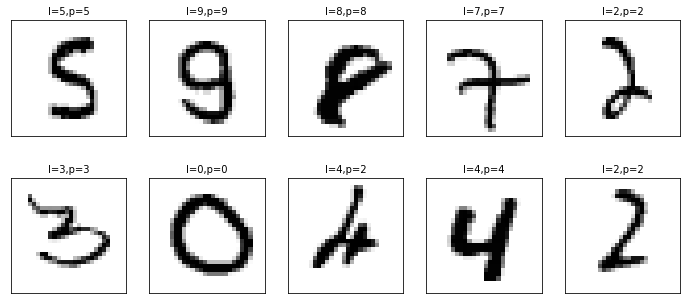

	[Info] Error analysis:


In [24]:
import os  
  
def isDisplayAvl():  
    return True  
print("\t[Info] Making prediction to x_Test_norm")  
prediction = model.predict_classes(x_Test_norm)  # Making prediction and save result to prediction  
print()  
print("\t[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[240:250]))  
  
if isDisplayAvl():  
    plot_images_labels_predict(X_test_image, y_test_label, prediction, idx=240)  
print("\t[Info] Error analysis:")  


In [25]:
for i in range(len(prediction)):  
    if prediction[i] != y_test_label[i]:  
        print("\tAt %d'th: %d is with wrong prediction as %d!" % (i, y_test_label[i], prediction[i]))  
        

	At 8'th: 5 is with wrong prediction as 6!
	At 247'th: 4 is with wrong prediction as 2!
	At 321'th: 2 is with wrong prediction as 7!
	At 340'th: 5 is with wrong prediction as 3!
	At 381'th: 3 is with wrong prediction as 7!
	At 445'th: 6 is with wrong prediction as 0!
	At 495'th: 8 is with wrong prediction as 2!
	At 582'th: 8 is with wrong prediction as 2!
	At 619'th: 1 is with wrong prediction as 8!
	At 684'th: 7 is with wrong prediction as 3!
	At 691'th: 8 is with wrong prediction as 4!
	At 707'th: 4 is with wrong prediction as 9!
	At 720'th: 5 is with wrong prediction as 8!
	At 740'th: 4 is with wrong prediction as 9!
	At 951'th: 5 is with wrong prediction as 4!
	At 956'th: 1 is with wrong prediction as 2!
	At 965'th: 6 is with wrong prediction as 0!
	At 1003'th: 5 is with wrong prediction as 3!
	At 1014'th: 6 is with wrong prediction as 5!
	At 1039'th: 7 is with wrong prediction as 2!
	At 1112'th: 4 is with wrong prediction as 6!
	At 1128'th: 3 is with wrong prediction as 7!
	At 119

上面可以發現有個預測結果為 2, 但實際 label 為 4. 

## 顯示混淆矩陣 (Confusion matrix) 
 如果我們想要進一步知道建立的模型中, 那些數字預測準確率最高, 那些數字最容易混淆, 此時可以使用混淆矩陣 (Confusion matrix). 在機器學習領域, 特別是統計分類的問題, 混淆矩陣 (也稱為 error matrix) 是一種特定的表格顯示方式, 可以讓我們以視覺化的方式, 了解 Supervisored Learning 的結果, 看出訓練出來的模型在各個類別的表現狀況. 

### STEP1. 使用 pandas crosstab 建立混淆矩陣 (Confusion matrix) 

In [26]:
print("\t[Info] Display Confusion Matrix:")  
import pandas as pd  
print("%s\n" % pd.crosstab(y_test_label, prediction, rownames=['label'], colnames=['predict']))  

	[Info] Display Confusion Matrix:
predict    0     1     2    3    4    5    6     7    8    9
label                                                       
0        969     0     1    0    1    1    3     1    2    2
1          0  1124     4    0    0    1    3     0    3    0
2          3     0  1011    4    2    0    2     6    4    0
3          1     0     4  992    0    4    0     5    4    0
4          0     0     4    0  967    0    3     1    1    6
5          3     0     0   11    1  862    7     1    5    2
6          5     2     1    1    4    3  942     0    0    0
7          1     4    10    3    0    0    0  1003    2    5
8          4     0     4    7    5    1    3     3  945    2
9          2     4     0    9   10    1    0     6    1  976



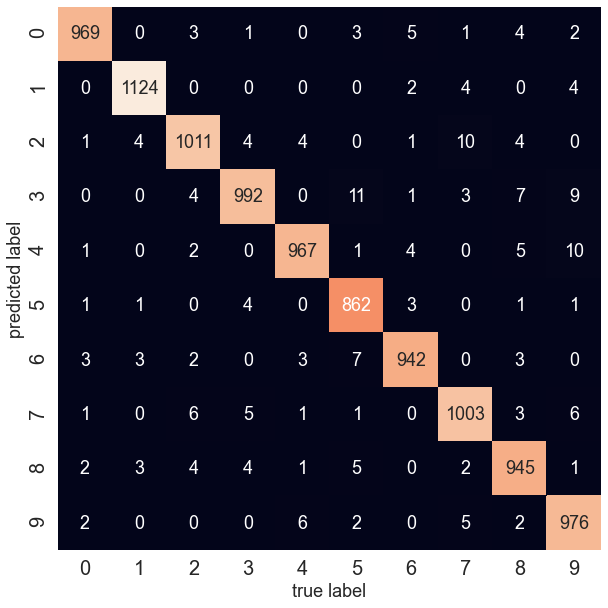

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize = (10,10))
mat = confusion_matrix(y_test_label, prediction)
sns.set(font_scale=1.5)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('true label')
plt.ylabel('predicted label');

### STEP2. 建立真實與預測的 dataframe 
我們希望找出那些 label 結果為 "5" 的結果被預測成 "3" 的資料, 所以建立的下面的 dataframe: 

In [28]:
>>> df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
>>> df[:2] # 顯示前兩筆資料

,label,predict
0,7,7
1,2,2


### STEP3. 查詢 label=5; prediction=3 的資料 
Pandas Dataframe 可以讓你很方便的查詢資料: 

In [29]:
>>> out = df[(df.label==5) & (df.predict==3)] # 查詢 label=5; predict=3 的 records
>>> out.__class__ # 輸出是另一個 DataFrame

>>> out

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3902,5,3
4360,5,3
5937,5,3


### STEP4. 查看第 340 筆資料 

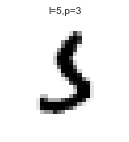

In [30]:
plot_images_labels_predict(X_test_image, y_test_label, prediction, idx=340, num=1)

## 儲存先前model

In [31]:
model.save('my_model.h5') 
del model  # deletes the existing model

## 讀取先前model

In [32]:
from keras import models    
from keras.models import load_model
mymodel = load_model('my_model.h5')

## 隱藏層增加為 1000 個神經元 
為了增加準確率, 我們將 Hidden layers 的數目從 256 提升到 1000 個神經元: 

In [33]:
from keras.models import Sequential  
from keras.layers import Dense  
  
model = Sequential()  # Build Linear Model  
  
model.add(Dense(units=1000, input_dim=784, kernel_initializer='normal', activation='relu')) # Modify hidden layer from 256 -> 1000  
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))   
print("\t[Info] Model summary:")  
model.summary()  
print("")  

	[Info] Model summary:
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________



In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)  

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.2875 - accuracy: 0.9172 - val_loss: 0.1502 - val_accuracy: 0.9588
Epoch 2/10
 - 1s - loss: 0.1144 - accuracy: 0.9678 - val_loss: 0.1007 - val_accuracy: 0.9705
Epoch 3/10
 - 1s - loss: 0.0728 - accuracy: 0.9793 - val_loss: 0.0947 - val_accuracy: 0.9716
Epoch 4/10
 - 1s - loss: 0.0524 - accuracy: 0.9853 - val_loss: 0.0809 - val_accuracy: 0.9747
Epoch 5/10
 - 1s - loss: 0.0362 - accuracy: 0.9897 - val_loss: 0.0766 - val_accuracy: 0.9777
Epoch 6/10
 - 1s - loss: 0.0249 - accuracy: 0.9938 - val_loss: 0.0728 - val_accuracy: 0.9792
Epoch 7/10
 - 1s - loss: 0.0181 - accuracy: 0.9958 - val_loss: 0.0721 - val_accuracy: 0.9777
Epoch 8/10
 - 1s - loss: 0.0133 - accuracy: 0.9970 - val_loss: 0.0761 - val_accuracy: 0.9785
Epoch 9/10
 - 1s - loss: 0.0093 - accuracy: 0.9984 - val_loss: 0.0715 - val_accuracy: 0.9797
Epoch 10/10
 - 1s - loss: 0.0069 - accuracy: 0.9990 - val_loss: 0.0701 - val_accuracy: 0.9803


In [35]:
import matplotlib.pyplot as plt  
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  

In [36]:
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0)) 

10000/10000 [==============================] - 0s 39us/step

	[Info] Accuracy of testing data = 98.2%


從下面的 "accuracy" vs "validation accuracy" 的圖可以看出兩者差距拉大 (training accuracy > validation accuracy), 說明 Overfitting 問題變嚴重: 

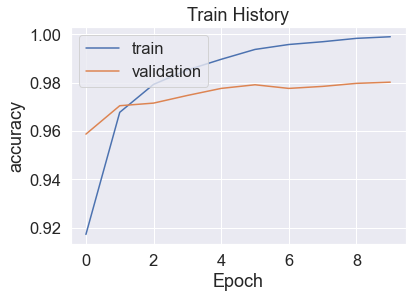

In [37]:
show_train_history(train_history, 'accuracy', 'val_accuracy')  

### 多層感知器加入 DropOut 功能以避免 Overfitting 
為了解決 Overfitting 問題, 接下來會加入 Dropout 功能, 以避免 Overfitting, 關於 Dropout 的簡單說明如下: 

In [38]:
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import Dropout  # ***** Import DropOut mooule *****  
  
model = Sequential()    
  
model.add(Dense(units=1000, input_dim=784, kernel_initializer='normal', activation='relu'))   
model.add(Dropout(0.5))  # ***** Add DropOut functionality *****  
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))   
print("\t[Info] Model summary:")  
model.summary()  
print("")  

	[Info] Model summary:
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________



In [39]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)  

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.3605 - accuracy: 0.8915 - val_loss: 0.1593 - val_accuracy: 0.9574
Epoch 2/10
 - 1s - loss: 0.1598 - accuracy: 0.9531 - val_loss: 0.1187 - val_accuracy: 0.9654
Epoch 3/10
 - 1s - loss: 0.1165 - accuracy: 0.9652 - val_loss: 0.0983 - val_accuracy: 0.9715
Epoch 4/10
 - 1s - loss: 0.0925 - accuracy: 0.9722 - val_loss: 0.0857 - val_accuracy: 0.9733
Epoch 5/10
 - 1s - loss: 0.0741 - accuracy: 0.9781 - val_loss: 0.0779 - val_accuracy: 0.9766
Epoch 6/10
 - 1s - loss: 0.0656 - accuracy: 0.9798 - val_loss: 0.0752 - val_accuracy: 0.9781
Epoch 7/10
 - 1s - loss: 0.0542 - accuracy: 0.9836 - val_loss: 0.0702 - val_accuracy: 0.9780
Epoch 8/10
 - 1s - loss: 0.0466 - accuracy: 0.9858 - val_loss: 0.0712 - val_accuracy: 0.9779
Epoch 9/10
 - 1s - loss: 0.0440 - accuracy: 0.9864 - val_loss: 0.0665 - val_accuracy: 0.9796
Epoch 10/10
 - 1s - loss: 0.0377 - accuracy: 0.9881 - val_loss: 0.0641 - val_accuracy: 0.9819


In [40]:
import matplotlib.pyplot as plt  
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  

In [41]:
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0)) 

10000/10000 [==============================] - 0s 38us/step

	[Info] Accuracy of testing data = 98.0%


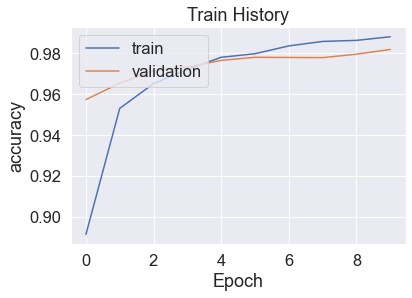

In [42]:
show_train_history(train_history, 'accuracy', 'val_accuracy')  

## 建立多層感知器模型 (包含兩個 Hidden Layers) 
為了進一步提升準確率, 我們打算提升多元感知器 Hidden layer 的層數. 
### STEP1. 變更模型使用兩個 Hidden Layers 並加入 DropOut 功能 

In [43]:
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import Dropout  # Import DropOut mooule  
  
model = Sequential()  # Build Linear Model  
  
model.add(Dense(units=1000, input_dim=784, kernel_initializer='normal', activation='relu')) # Add Input/ first hidden layer  
model.add(Dropout(0.5))  # Add DropOut functionality  
model.add(Dense(units=1000, kernel_initializer='normal', activation='relu')) # Add second hidden layer  
model.add(Dropout(0.5))  # Add DropOut functionality  
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax')) # Add Hidden/output layer  
print("\t[Info] Model summary:")  
model.summary()  
print("")  


	[Info] Model summary:
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________



In [44]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)  

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.3721 - accuracy: 0.8834 - val_loss: 0.1415 - val_accuracy: 0.9567
Epoch 2/10
 - 1s - loss: 0.1604 - accuracy: 0.9498 - val_loss: 0.0996 - val_accuracy: 0.9718
Epoch 3/10
 - 1s - loss: 0.1224 - accuracy: 0.9617 - val_loss: 0.0873 - val_accuracy: 0.9733
Epoch 4/10
 - 1s - loss: 0.0982 - accuracy: 0.9694 - val_loss: 0.0760 - val_accuracy: 0.9770
Epoch 5/10
 - 1s - loss: 0.0836 - accuracy: 0.9737 - val_loss: 0.0817 - val_accuracy: 0.9765
Epoch 6/10
 - 1s - loss: 0.0730 - accuracy: 0.9773 - val_loss: 0.0834 - val_accuracy: 0.9762
Epoch 7/10
 - 1s - loss: 0.0669 - accuracy: 0.9786 - val_loss: 0.0681 - val_accuracy: 0.9804
Epoch 8/10
 - 1s - loss: 0.0617 - accuracy: 0.9803 - val_loss: 0.0781 - val_accuracy: 0.9783
Epoch 9/10
 - 1s - loss: 0.0579 - accuracy: 0.9812 - val_loss: 0.0735 - val_accuracy: 0.9787
Epoch 10/10
 - 1s - loss: 0.0518 - accuracy: 0.9831 - val_loss: 0.0753 - val_accuracy: 0.9786


In [45]:
import matplotlib.pyplot as plt  
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  

In [46]:
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0)) 

10000/10000 [==============================] - 0s 40us/step

	[Info] Accuracy of testing data = 98.0%


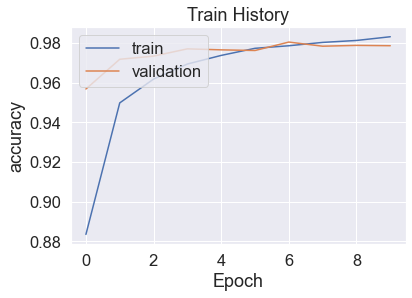

In [47]:
show_train_history(train_history, 'accuracy', 'val_accuracy')  

# loadtest

In [48]:
scores = mymodel.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0)) 

10000/10000 [==============================] - 0s 42us/step

	[Info] Accuracy of testing data = 97.9%
